In [ ]:
#Install Required Libraries
#Download YouTube Comments Without API -  install it globally:

!pip install pandas textblob matplotlib
!pip install youtube-comment-downloader

In [ ]:
#Then download comments via terminal:
!youtube-comment-downloader --url https://www.youtube.com/watch?v=dMn2QFTyXUQ --output comments.json

Downloaded 1412 comment(s)
[34.53 seconds] Done!


In [ ]:
# Importing necessary libraries
import pandas as pd                            # For data handling and manipulation
import json                                    # For reading JSON files (YouTube comment data)
from textblob import TextBlob                  # For performing sentiment analysis
import matplotlib.pyplot as plt                # For visualizing sentiment results
import re                                      # For regular expression operations (text cleaning)
import nltk                                    # Natural Language Toolkit - used for tokenization and other NLP tasks

# Downloading required tokenizer data for TextBlob (needed only once)
nltk.download('punkt')                        # Downloads the Punkt tokenizer models for sentence splitting

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# -------Load JSON comments into DataFrame-------

comments = []

with open("comments.json", 'r', encoding='utf-8') as f:
    for line in f:
        data = json.loads(line)          # Parse the JSON string into a Python dictionary
        comments.append(data['text'])    # Extract the 'text' field (actual comment) and add it to the list

df = pd.DataFrame(comments, columns=['comment'])


In [ ]:
# ----------- Text Preprocessing Function ------------
def clean_comment(text):
    text = text.lower()                                # Convert to lowercase
    text = re.sub(r"http\S+", "", text)                # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)            # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip()           # Remove extra spaces
    return text

df['clean_comment'] = df['comment'].apply(clean_comment)

In [ ]:
# ----------- Sentiment Analysis using TextBlob --------

# Define a function that returns the sentiment polarity score of a given text
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Returns a float between -1.0 (very negative) and +1.0 (very positive)

# Apply the sentiment function to each cleaned comment and store the result in a new column 'sentiment_score'
df['sentiment_score'] = df['clean_comment'].apply(get_sentiment)

# Define a function to label the sentiment based on the polarity score
def sentiment_label(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

# Apply the sentiment labeling function to assign a sentiment category for each comment
df['sentiment'] = df['sentiment_score'].apply(sentiment_label)


In [ ]:
# ----------- Display Results ------------------------
print(df[['comment', 'sentiment_score', 'sentiment']].head())

                                             comment  sentiment_score  \
0  Checkout Simplilearn's Data Analytics Course: ...              0.0   
1                                         Harry bhai              0.0   
2                Which degree to persue after 12th??              0.0   
3  Is there any placement guaranteed sites after ...              0.0   
4                         gift me this course please              0.0   

  sentiment  
0   Neutral  
1   Neutral  
2   Neutral  
3   Neutral  
4   Neutral  


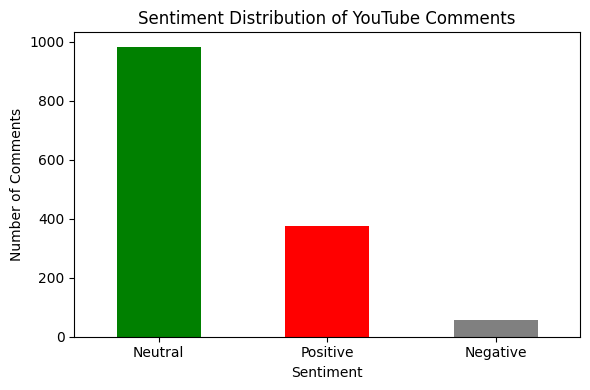

In [ ]:
# ----------- Visualize Sentiment Distribution -------
plt.figure(figsize=(6, 4))
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution of YouTube Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()